In [1]:
#Clustering
"""
1- Centroid-Based Clustering -> K-means
2- Hierarchical Clustering -> -Divisive -Agglomerative
3- Density Models -> DBSCAN, OPTICS
"""

In [2]:
#K-Means

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv('data/Mall_Customers.csv')
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
X = dataset.iloc[:,3:]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


C:\Users\hp\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


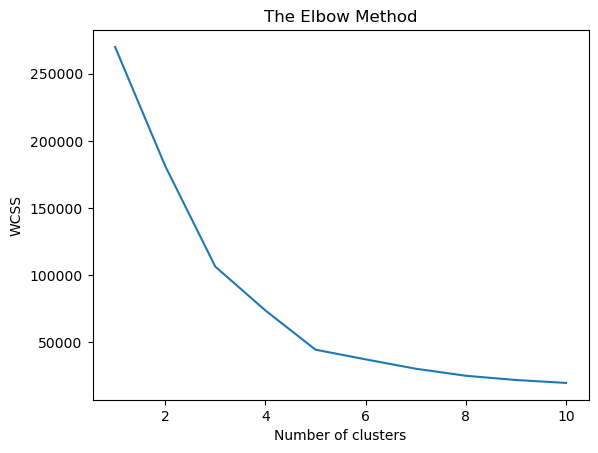

In [6]:
#Dirsek (Elbow) Metodu
from sklearn.cluster import KMeans

wcss = [] #within cluster sum of squared error
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [7]:
#K = 5

In [8]:
kmeans = KMeans(n_clusters = 5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [9]:
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [11]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
test = kmeans.predict([[15, #Annual Income (k$)
                        39, #Spending Score (1-100)
                       ]])
print('Bu nokta', test[0], 'numaralı kümeye aittir')

Bu nokta 2 numaralı kümeye aittir


In [14]:
X[y_kmeans == 0].head(10)

,Annual Income (k$),Spending Score (1-100)
43,39,61
46,40,55
47,40,47
48,40,42
49,40,42
50,42,52
51,42,60
52,43,54
53,43,60
54,43,45


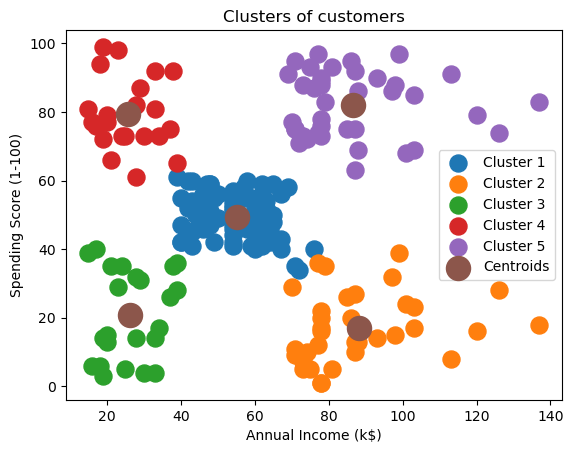

In [22]:
plt.scatter(X[y_kmeans == 0]['Annual Income (k$)'],X[y_kmeans == 0]['Spending Score (1-100)'], s = 150, label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1]['Annual Income (k$)'],X[y_kmeans == 1]['Spending Score (1-100)'], s = 150, label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2]['Annual Income (k$)'],X[y_kmeans == 2]['Spending Score (1-100)'], s = 150, label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3]['Annual Income (k$)'],X[y_kmeans == 3]['Spending Score (1-100)'], s = 150, label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4]['Annual Income (k$)'],X[y_kmeans == 4]['Spending Score (1-100)'], s = 150, label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 300, label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [23]:
#Agglomerative : Bottom-Up
#Divisive : Top-Down

In [24]:
customer_data = pd.read_csv('data/Mall_Customers.csv')
customer_data.shape

(200, 5)

In [25]:
customer_data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [29]:
data = customer_data.iloc[:, 3:5]
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [30]:
data = customer_data.iloc[:, 3:5].values

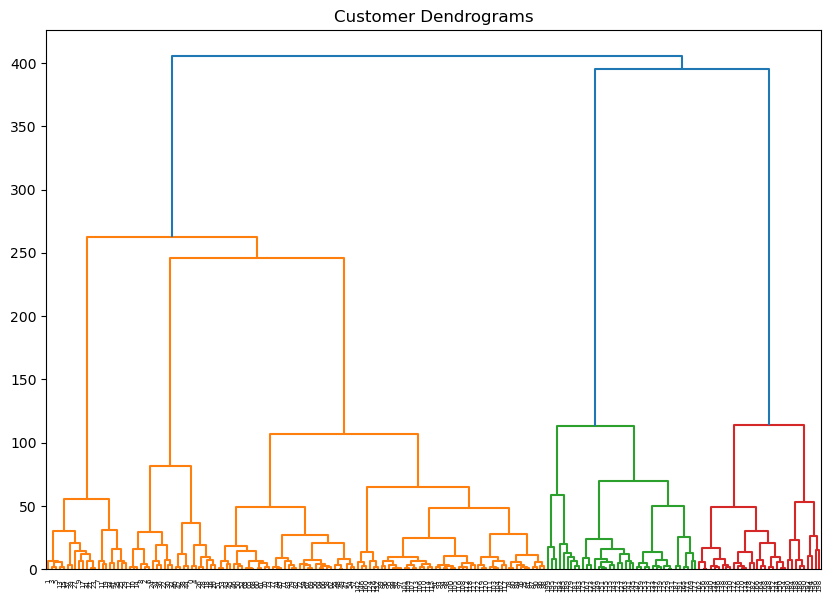

In [32]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize = (10,7))
plt.title("Customer Dendrograms")
dend = shc.dendrogram(shc.linkage(data, method = 'ward'))

In [33]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
cluster.fit_predict(data)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

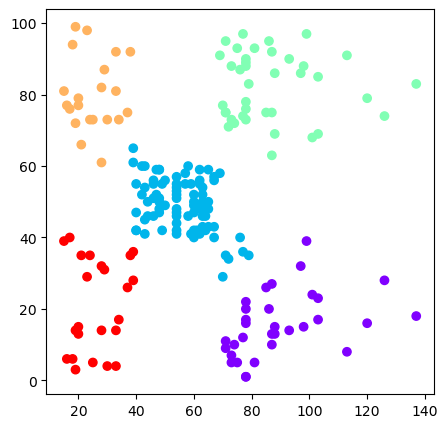

In [34]:
plt.figure(figsize = (5,5))
plt.scatter(data[:, 0], data[:, 1], c = cluster.labels_, cmap = 'rainbow')
plt.show()

In [38]:
!pip install gym==0.4.4

In [40]:
!pip install pyglet==1.5.27

In [ ]:
import gym
env = gym.make("CartPole-v0")
env.reset()

for _ in range(1000):
    env.render()
    env.step(env.action_space.sample())

In [41]:
#Version-2

In [ ]:
import gym
env = gym.make('CartPole-v0')

for _ in range(20):
    observation = env.reset()
    
    for i in range(100):
        env.render()
        print(observation)
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode finished after {} timesteps".format(i+1))
            break